In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

# HW 1 / S2

In [2]:
# Read the excel file
df = pd.read_excel("Industry_Portfolios.xlsx")

df = df.drop(columns = "Date")

In [3]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
115,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [4]:
# if need to rename columns
# df.columns = ['V', 'W', 'X', 'Y', 'Z']

## Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [4]:
# Empty lists
name = []
returns = []
mean = []
std = []

# Iterate columns
for column in df:
    values = df[column]
    mean_return = statistics.mean(values)
    std_return = statistics.stdev(values)
    
    name.append(column)
    returns.append(values)
    mean.append(mean_return)
    std.append(std_return)

# Tabulate
table = zip(name, mean, std)
col_names = ["Name","Mean Return","Standard Deviation of Return"]
print(tabulate(table, headers = col_names))

Name      Mean Return    Standard Deviation of Return
------  -------------  ------------------------------
NoDur        0.902833                         3.34566
Durbl        0.733333                         8.36185
Manuf        1.01283                          5.31027
Enrgy        1.23117                          6.08152
HiTec        0.76625                          5.38119
Telcm        0.881417                         4.44828
Shops        0.916333                         4.09379
Hlth         0.783833                         3.78717
Utils        0.907167                         3.70176
Other        0.489083                         5.58245


## Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.
This graph must have expected (monthly) return on the vertical axis and standard deviation of (monthly) return on the horizontal axis.
This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

In [5]:
# Set Matrix
R = np.matrix(mean).getT()
V = np.cov(returns)
e = np.matrix("1; 1; 1; 1; 1; 1; 1; 1; 1; 1")

RT = R.transpose()
eT = e.transpose()
VI = np.linalg.inv(V)

# Set Variables
alpha = RT * VI * e
zeta = RT * VI * R
delta = eT * VI * e

In [6]:
#matrix to float
alpha = alpha[0,0]
zeta = zeta[0,0]
delta = delta[0,0]

print(alpha,zeta,delta)

0.1379432386993189 0.19640858464482272 0.1373875973567116


Text(0.5, 1.0, 'minimum-tracking-error frontier')

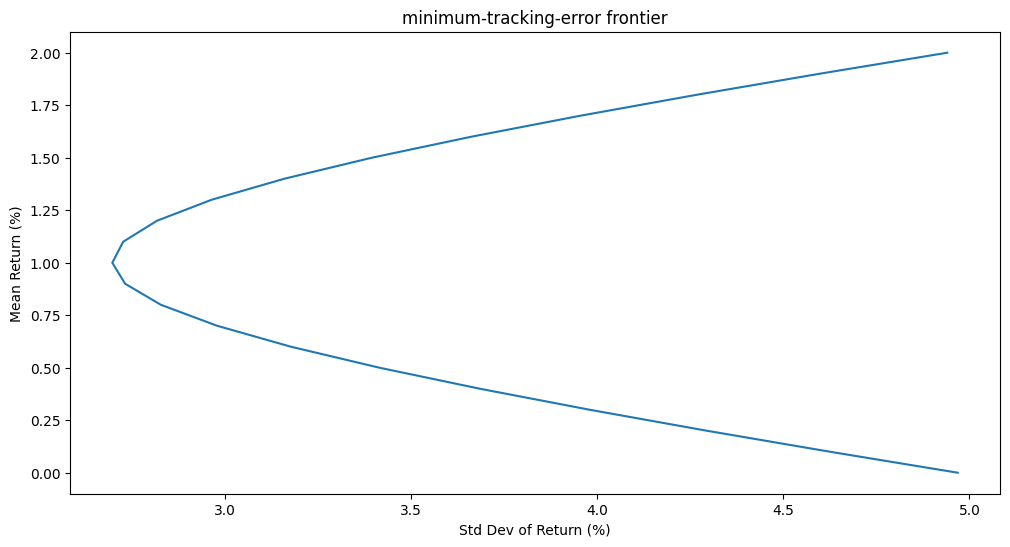

In [7]:
Rmv = alpha / delta

y = np.arange(0,2.1,0.1)

x = (1/delta + (delta / (zeta * delta - alpha**2)) * ((y - Rmv)**2))**0.5

plt.figure(figsize = (12, 6))
plt.plot(x,y)
plt.ylabel("Mean Return (%)")
plt.xlabel("Std Dev of Return (%)")
plt.title("Portfolio Frontiers")

## Now suppose that the (net) risk-free rate is 0.13% per month:
Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

In [8]:
# Risk Free 
Rf = 0.13

xt = np.array([0,5])
yt = Rf + (((zeta - (2 * alpha * Rf) + (delta * (Rf**2))))**0.5) * xt

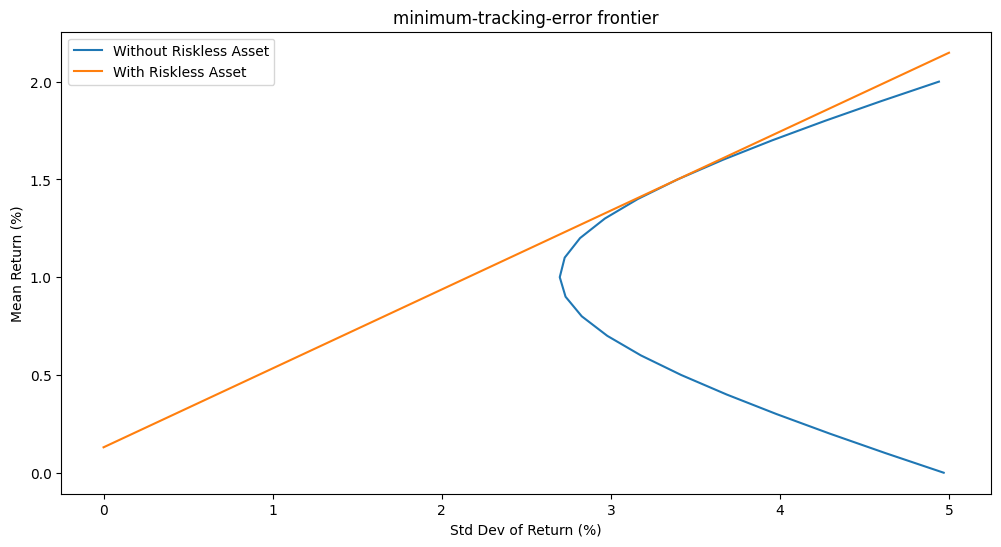

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(x,y,label="Without Riskless Asset")
plt.plot(xt,yt,label="With Riskless Asset")
plt.ylabel("Mean Return (%)")
plt.xlabel("Std Dev of Return (%)")
plt.title("Portfolio Frontiers")
plt.legend()

## The two frontiers will intersect at single point: the tangency portfolio:
Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [11]:
# Sharpe Ratio
Sharpe = (zeta - (2 * alpha * Rf) + (delta * (Rf**2)))**0.5

print("The Sharpe ratio for the tangency portfolio is", Sharpe)

The Sharpe ratio for the tangency portfolio is 0.40356559934950875


In [15]:
# Mean Return
Rtg = (alpha * Rf - zeta) / (delta * Rf - alpha)

# Standard Deviation
Std = (Rtg-Rf)/Sharpe

#Lagrange Multiplier
lamb = (Rtg - Rf)/(zeta - (2 * alpha * Rf) + (delta * Rf * Rf))
wstar = lamb * VI * (R - Rf * e)

table = zip(name, wstar)
col_names = ["Name","Tangency Portfolio Weights"]
print("The tangency portfolio weights for the ten industry portfolios is")
print(tabulate(table, headers = col_names))

The tangency portfolio weights for the ten industry portfolios is
Name      Tangency Portfolio Weights
------  ----------------------------
NoDur                      0.567972
Durbl                     -0.214073
Manuf                      0.714105
Enrgy                      0.104087
HiTec                     -0.363438
Telcm                     -0.0954633
Shops                      0.991647
Hlth                       0.0755702
Utils                      0.132643
Other                     -0.913051


In [14]:
print("The Mean Return for the tangency portfolio is", Rtg)
print("The Standard Deviation for the tangency portfolio is", Std)

The Mean Return for the tangency portfolio is 1.486273535844691
The Standard Deviation for the tangency portfolio is 3.360726330566367


## Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

Minimum-variance frontier represents outermost envelope of attainable portfolios ⇒ no attainable portfolio exists on the left of the minimum-variance frontier.

Efficient frontier consists of portfolios with highest potential reward for given amount of risk ⇒ risk-averse investor must invest in (optimal) portfolio on efficient frontier to maximise expected utility.

Tangency portfolio has the highest possible Sharpe ratio.

# HW 2 / S3

In [12]:
industry_df = pd.read_excel("Industry_Portfolios.xlsx")
market_df = pd.read_excel("Market_Portfolio.xlsx")

industry_df = industry_df.drop(columns = "Date")

In [13]:
market_df

,Date,Market
0,200401,2.22
1,200402,1.46
2,200403,-1.23
3,200404,-1.75
4,200405,1.23
...,...,...
115,201308,-2.69
116,201309,3.76
117,201310,4.17
118,201311,3.12


## Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.
Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [14]:
# since excess returns, so subtract Rf
Rf = 0.13
excess_market_df = market_df - Rf
excess_industry_df = industry_df - Rf

name = []
alpha = []
beta = []

results = []
for col in excess_industry_df:
    result = np.polyfit(excess_market_df["Market"], excess_industry_df[col], deg=1)
    name.append(col)
    alpha.append(result[1])
    beta.append(result[0])
    
#tabulate
table = zip(name, alpha, beta)
col_names = ["Name","Intercept Coefficient","Slope Coefficient"]
print(tabulate(table, headers = col_names))

Name      Intercept Coefficient    Slope Coefficient
------  -----------------------  -------------------
NoDur                 0.369443              0.652647
Durbl                -0.415599              1.64854
Manuf                 0.159771              1.16985
Enrgy                 0.501719              0.96985
HiTec                -0.0640195             1.13297
Telcm                 0.194691              0.900729
Shops                 0.275492              0.826492
Hlth                  0.237841              0.673036
Utils                 0.444585              0.538086
Other                -0.387135              1.20731


## Security Market Line (SML)
Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

### Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

Text(0.5, 1.0, 'Security Market Line (SML)')

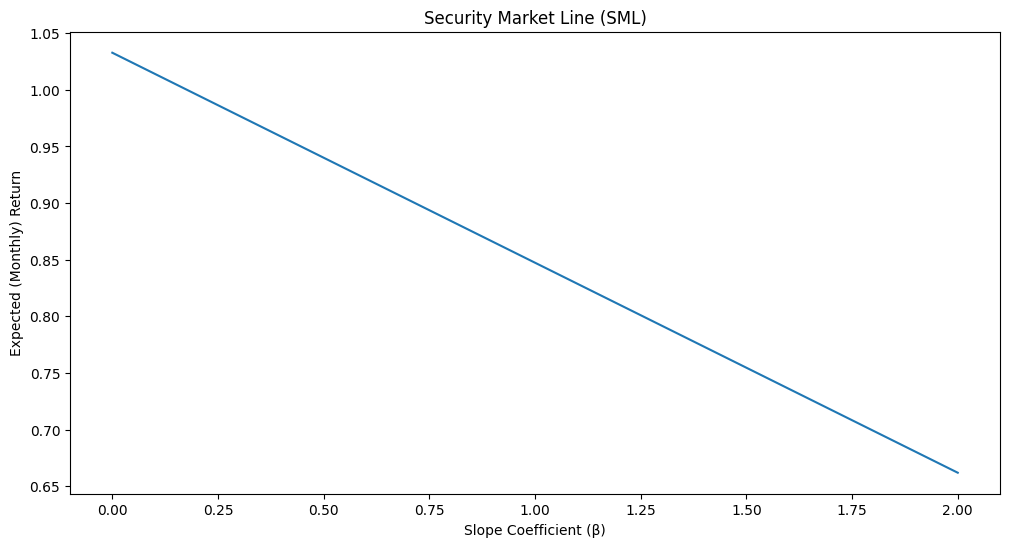

In [15]:
mean = []
for col in industry_df:
    values = industry_df[col]
    mean_return = statistics.mean(values)
    mean.append(mean_return)
    
#market portfolio mean
market_mean = statistics.mean(market_df["Market"])
mean.append(market_mean)

#add market portfolio to beta values
market_beta = 1
beta.append(market_beta)

#regression
result = np.polyfit(beta, mean, deg=1)
result

x = [0,2]
y = [result[1],2*result[0] + result[1]]
plt.figure(figsize = (12, 6))
plt.plot(x,y)
plt.ylabel("Expected (Monthly) Return")
plt.xlabel("Slope Coefficient (β)")
plt.title("Security Market Line (SML)")



Text(0.5, 1.0, 'Security Market Line (SML)')

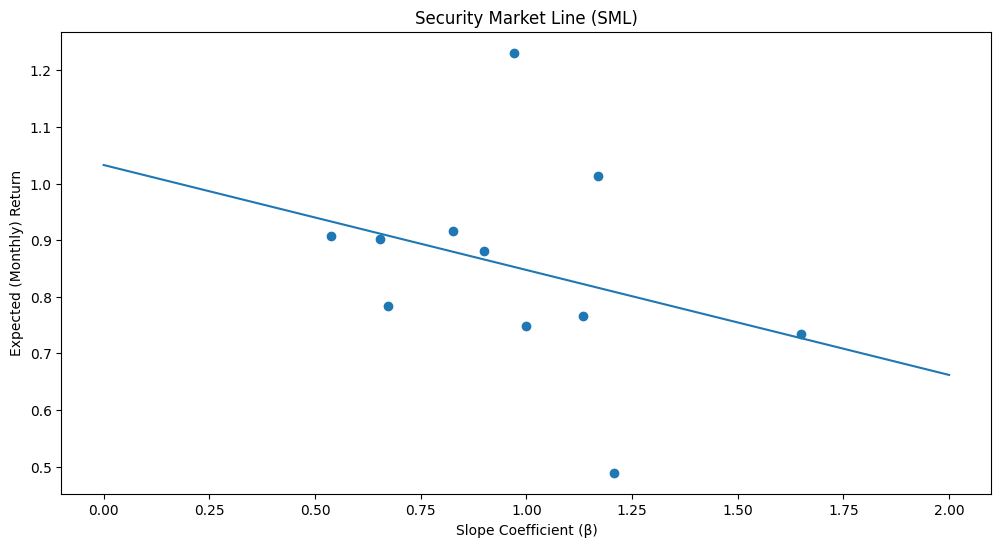

In [16]:
plt.figure(figsize = (12, 6))
plt.scatter(beta,mean)


x = [0,2]
y = [result[1],2*result[0] + result[1]]
plt.plot(x,y)
plt.ylabel("Expected (Monthly) Return")
plt.xlabel("Slope Coefficient (β)")
plt.title("Security Market Line (SML)")

### Briefly explain the economic significance of the SML.

Intercept coefficient from market model regression shows pricing error relative to CAPM.

Slope coefficient from market model regression shows degree of exposure to market risk.

SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above SML are underpriced, while assets that lie below SML are overpriced.

# HW 3 / S4

In [17]:
#excel datasets

industry_df = pd.read_excel("Industry_Portfolios.xlsx")
market_df = pd.read_excel("Market_Portfolio.xlsx")
risk_df = pd.read_excel("Risk_Factors.xlsx")

industry_df = industry_df.drop(columns = "Date")

In [18]:
risk_df

,Date,Rf,Rm-Rf,SMB,HML
0,200401,0.07,2.15,2.67,1.55
1,200402,0.06,1.40,-1.17,0.45
2,200403,0.09,-1.32,1.84,0.07
3,200404,0.08,-1.83,-2.59,-1.67
4,200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...
115,201308,0.00,-2.69,0.29,-2.46
116,201309,0.00,3.76,2.85,-1.59
117,201310,0.00,4.17,-1.56,1.31
118,201311,0.00,3.12,1.34,-0.33


## SHARPE RATIO

In [19]:
name = []
sharpe = []
excess_industry_df = industry_df.copy()

for col in excess_industry_df:
    
    excess_industry_df[col] = industry_df[col] - risk_df["Rf"]
    mean_return = statistics.mean(excess_industry_df[col])
    std_return = statistics.stdev(excess_industry_df[col])
 
    sharpe_ratio = mean_return / std_return
    
    name.append(col)
    sharpe.append(sharpe_ratio)

# Tabulate
table = zip(name, sharpe)
col_names = ["Name","Sharpe Ratio"]
print(tabulate(table, headers = col_names))

Name      Sharpe Ratio
------  --------------
NoDur        0.231099
Durbl        0.0723556
Manuf        0.166616
Enrgy        0.181708
HiTec        0.118552
Telcm        0.169064
Shops        0.191753
Hlth         0.172529
Utils        0.210948
Other        0.0646929


## Sortino Ratio

In [20]:
name = []
SV = excess_industry_df.copy()
SV[SV > 0] = 0
SV = SV ** 2

sortino = []

for col in SV:
    mean_return = np.mean(excess_industry_df[col])
    sortino_ratio = mean_return / (SV[col].mean() ** 0.5)
    
    name.append(col)
    sortino.append(sortino_ratio)
    
# Tabulate
table = zip(name, sortino)
col_names = ["Name","Sortino Ratio"]
print(tabulate(table, headers = col_names))

Name      Sortino Ratio
------  ---------------
NoDur         0.350804
Durbl         0.111967
Manuf         0.24126
Enrgy         0.273612
HiTec         0.17062
Telcm         0.24494
Shops         0.293032
Hlth          0.270294
Utils         0.290044
Other         0.0873509


## Treynor Ratio

In [21]:
name = []
treynor = []

excess_market_df = market_df["Market"] - risk_df["Rf"]

for col in excess_industry_df:
    result = np.polyfit(excess_market_df, excess_industry_df[col], deg=1)
    beta = result[0]
    mean_return = statistics.mean(excess_industry_df[col])
    treynor_ratio = mean_return / beta
    
    name.append(col)
    treynor.append(treynor_ratio)
    
# Tabulate
table = zip(name, treynor)
col_names = ["Name","Treynor Ratio"]
print(tabulate(table, headers = col_names))    

Name      Treynor Ratio
------  ---------------
NoDur          1.18637
Durbl          0.367463
Manuf          0.758251
Enrgy          1.14333
HiTec          0.564295
Telcm          0.836363
Shops          0.951258
Hlth           0.971435
Utils          1.45233
Other          0.299781


## Jensen's a

In [22]:
name = []
jensen = []

for col in excess_industry_df:
    result = np.polyfit(excess_market_df, excess_industry_df[col], deg=1)
    beta = result[0]
    mean_return = np.mean(excess_industry_df[col])
    jensen_alpha = mean_return - beta * (risk_df["Rm-Rf"].mean())
    
    name.append(col)
    jensen.append(jensen_alpha)
    
# Tabulate
table = zip(name, jensen)
col_names = ["Name","Jensen's Alpha"]
print(tabulate(table, headers = col_names))

Name      Jensen's Alpha
------  ----------------
NoDur          0.369717
Durbl         -0.417903
Manuf          0.160494
Enrgy          0.504485
HiTec         -0.0640236
Telcm          0.194348
Shops          0.274093
Hlth           0.236968
Utils          0.446523
Other         -0.387508


## Three Factor a

In [23]:
factors = risk_df[['Rm-Rf','SMB','HML']]

name = []

result = LinearRegression().fit(factors, excess_industry_df)
result_coef = result.coef_
result_alpha = result.intercept_
    
for col in excess_industry_df:
    
    name.append(col)
    
# Tabulate
table = zip(name, result_alpha)
col_names = ["Name","Three-factor Alpha"]
print(tabulate(table, headers = col_names))

Name      Three-factor Alpha
------  --------------------
NoDur              0.386704
Durbl             -0.474342
Manuf              0.153285
Enrgy              0.523007
HiTec             -0.0659794
Telcm              0.200724
Shops              0.255941
Hlth               0.257472
Utils              0.474411
Other             -0.404412


## Create a table showing the performance metrics for the ten industry portfolios.

In [24]:
table = zip(name, sharpe, sortino,treynor,jensen ,result_alpha)
col_names = ["Name","Sharpe Ratio","Sortino Ratio","Treynor Ratio","Jensen's Alpha","Three-factor Alpha"]
print(tabulate(table, headers = col_names))

Name      Sharpe Ratio    Sortino Ratio    Treynor Ratio    Jensen's Alpha    Three-factor Alpha
------  --------------  ---------------  ---------------  ----------------  --------------------
NoDur        0.231099         0.350804          1.18637          0.369717              0.386704
Durbl        0.0723556        0.111967          0.367463        -0.417903             -0.474342
Manuf        0.166616         0.24126           0.758251         0.160494              0.153285
Enrgy        0.181708         0.273612          1.14333          0.504485              0.523007
HiTec        0.118552         0.17062           0.564295        -0.0640236            -0.0659794
Telcm        0.169064         0.24494           0.836363         0.194348              0.200724
Shops        0.191753         0.293032          0.951258         0.274093              0.255941
Hlth         0.172529         0.270294          0.971435         0.236968              0.257472
Utils        0.210948         0.29004

### Plot results as bar chart for each performance metric

Text(0.5, 1.0, 'Sharpe Ratio')

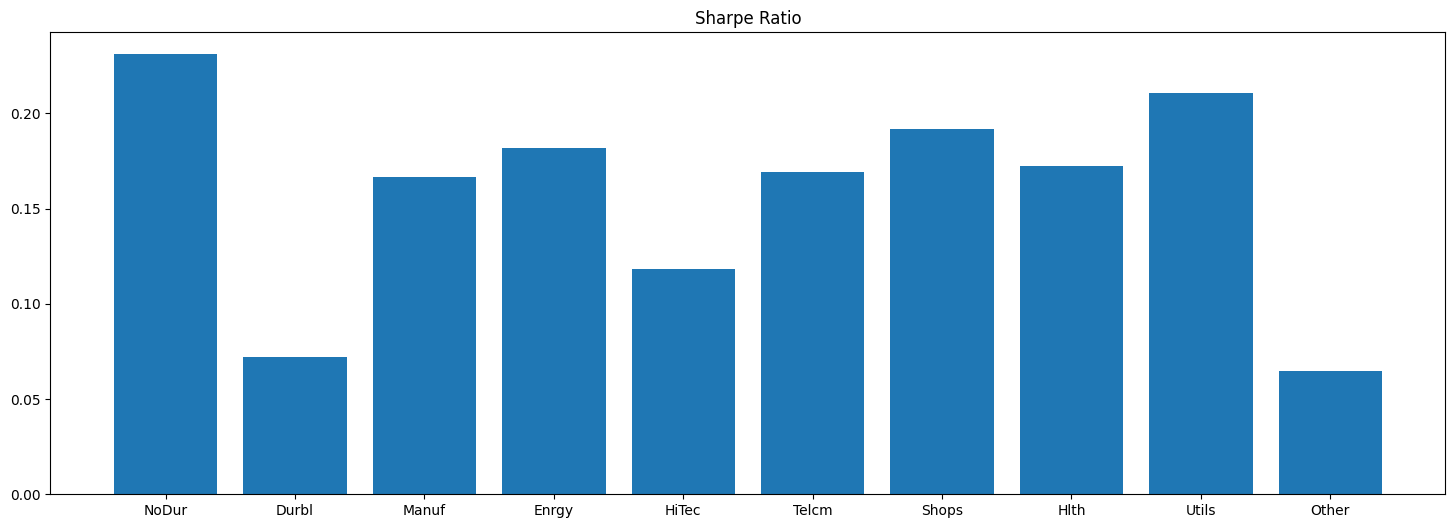

In [25]:
# plot sharpe ratio
plt.figure(figsize = (18, 6))
plt.bar(name,sharpe)
plt.title("Sharpe Ratio")

Text(0.5, 1.0, 'Sortino Ratio')

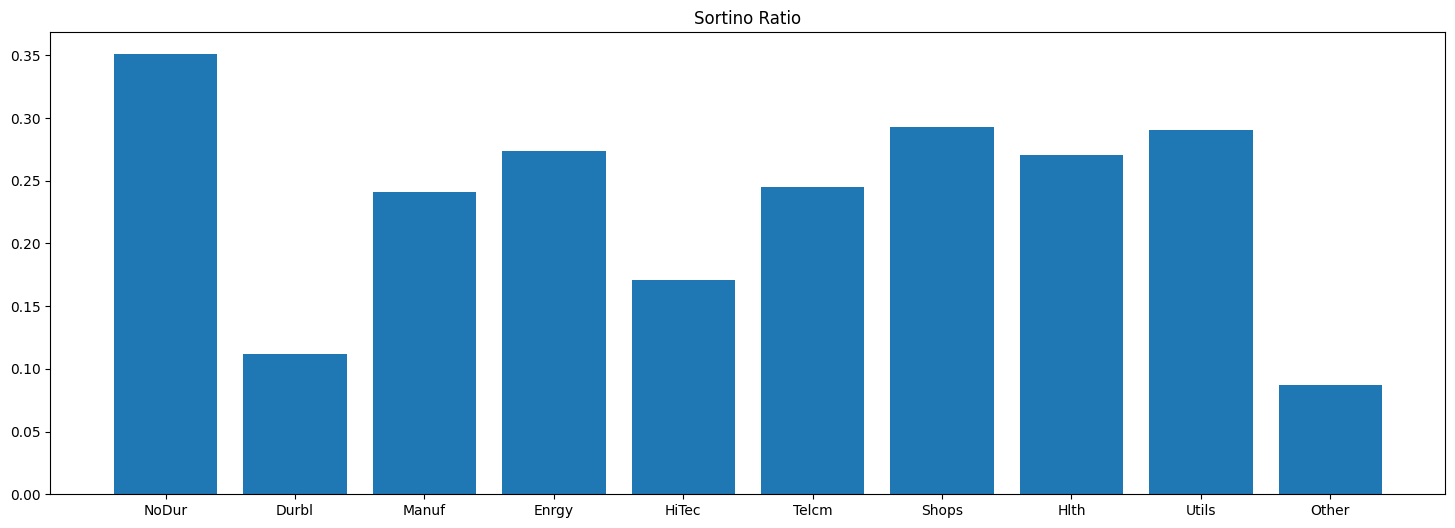

In [26]:
# plot sortino ratio
plt.figure(figsize = (18, 6))
plt.bar(name,sortino)
plt.title("Sortino Ratio")

Text(0.5, 1.0, 'Treynor Ratio')

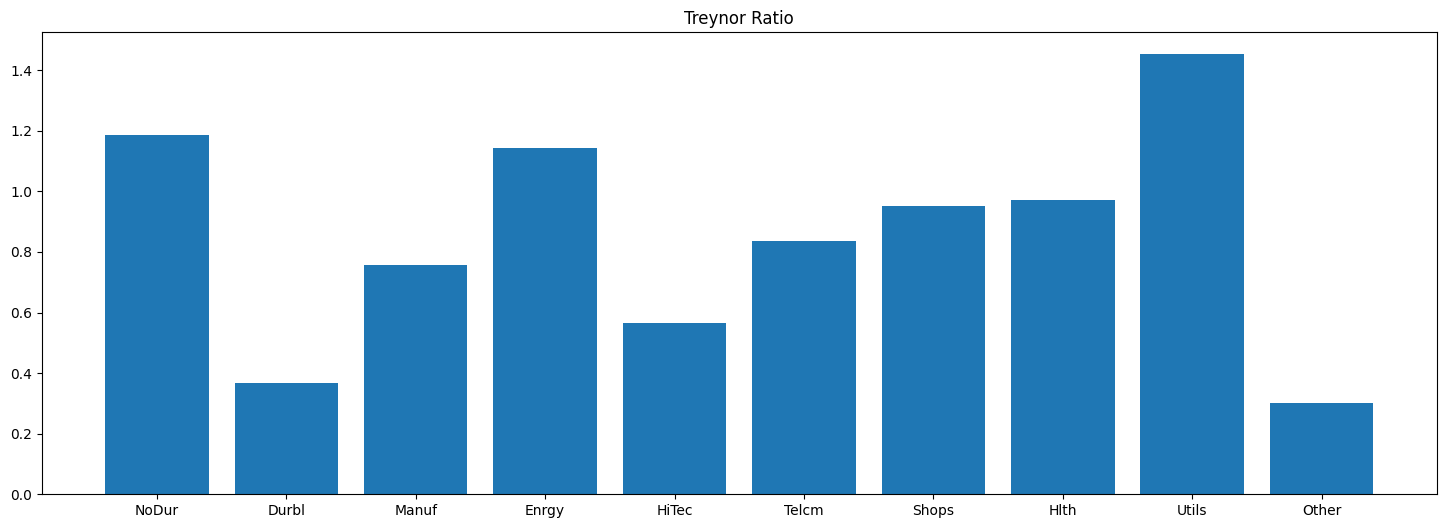

In [27]:
# plot treynor ratio
plt.figure(figsize = (18, 6))
plt.bar(name,treynor)
plt.title("Treynor Ratio")

Text(0.5, 1.0, "Jensen's Alpha")

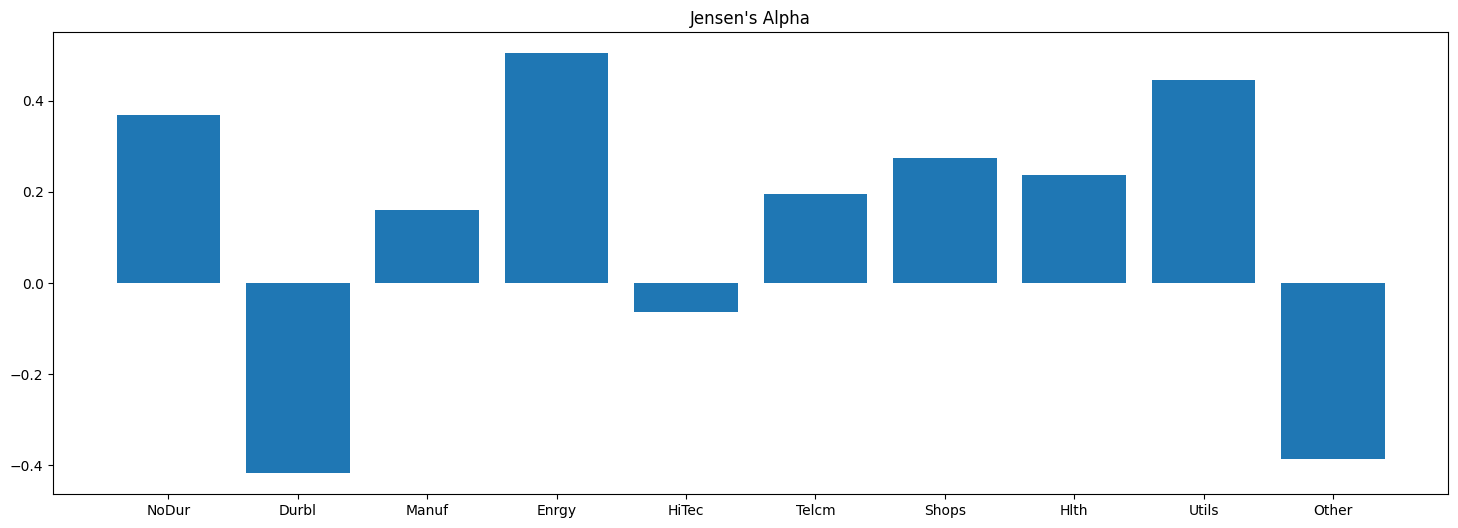

In [28]:
# plot jensen's alpha
plt.figure(figsize = (18, 6))
plt.bar(name,jensen)
plt.title("Jensen's Alpha")

Text(0.5, 1.0, 'Three-factor alpha')

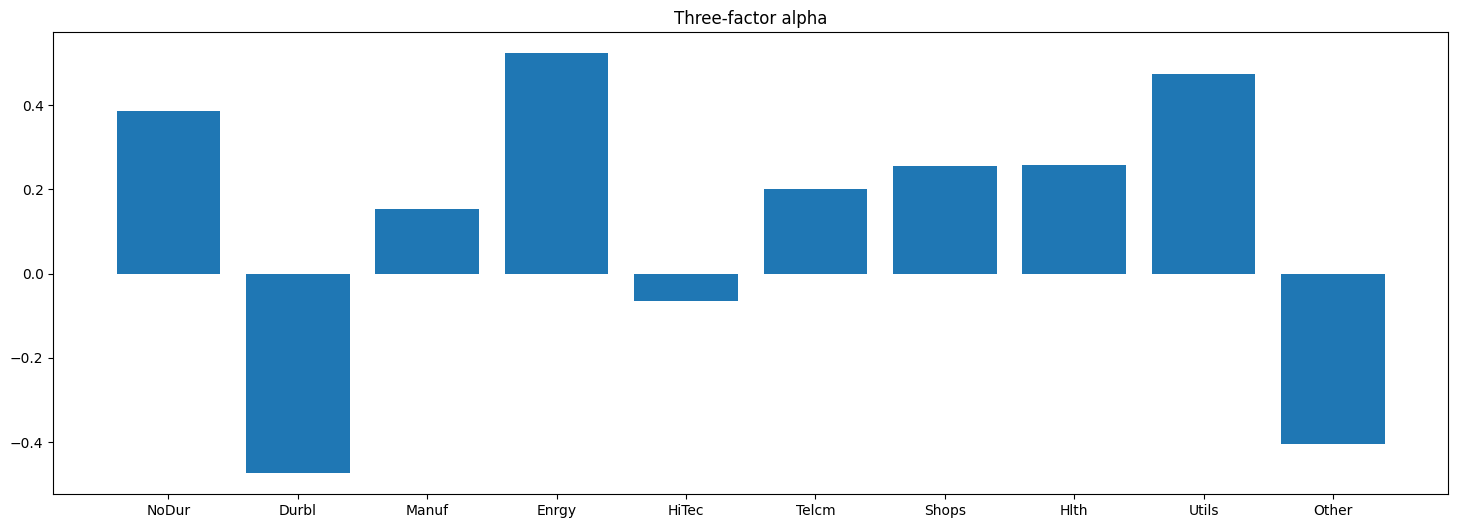

In [29]:
# plot three-factor alpha
plt.figure(figsize = (18, 6))
plt.bar(name,result_alpha)
plt.title("Three-factor alpha")

## Briefly explain the economic significance of each of the three performance ratioces.

### Sharpe Ratio: 
Sharpe Ratio is the risk premium per unit of total risk. The denominator is designed to capture total risk, both systematic and idiosyncratic risk. Since idiosyncratic risk penalises individual investments and non-diversified portfolios, it is not appropriate for comparing performance of individual investment to a diversified portfolio. Furthermore, the denominator ignores higher moments such as skewness and kurtosis, so it may not fully reflect risk of return if the return distribution is not normal. It implicitly assumes normal returns, so cannot distinguish between asymmetric return distributions with same variance but different skewness. A higher sharpe ratio indicates a better risk-adjusted performance.

### Sortino Ratio: 
Sortino ratio represents risk premium per unit of downside risk, which can distinguish between asymmetric return distributions with same variance but different skewness It will produce rankings similar to information ratio when return distribution is close to symmetric, and expected return is close to expected target return. It is more informative than information ratio or sharpe ratio when the return distribution is not normal. It fouses on downside risk, considering only the standard deviation of negative rturns. It provides ma more specific assesment of an investment's ability to protect against losses, allowing investors to minimize their losses.

### Treynor Ratio: 
Treynor ratio represents risk premium per unit of market risk, which ignores idiosyncratic risk as well as other types of systematic risk. The denominator is designed to capture systematic market risk and ignore idiosyncratic risk. In principle, it can be used to compare performance of individual investment to diversified portfolio. In practice, it will fail to account for other types of systematic risk besides market risk. It assesses how well an investment compensates for market-related risk. It helps distinguish between returns generated from market exposure and returns from other sources.

# HW 4 / S5

In [30]:
#excel datasets

industry_df = pd.read_excel("Industry_Portfolios.xlsx")
market_df = pd.read_excel("Market_Portfolio.xlsx")
risk_df = pd.read_excel("Risk_Factors.xlsx")

industry_df = industry_df.drop(columns = "Date")

## Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

Estimate the expected deviation from market return, for the ten industry portfolios

This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

In [31]:
name = []
returns = []
mean = []
std = []
excess_industry_df = industry_df.copy()

for col in excess_industry_df:
    excess_industry_df[col] = industry_df[col] - market_df["Market"]
    values = excess_industry_df[col]
    mean_return = statistics.mean(values)
    std_return = statistics.stdev(values)
    
    name.append(col)
    returns.append(values)
    mean.append(mean_return)
    std.append(std_return)

In [32]:
# Set Matrix
R = np.matrix(mean).getT()
V = np.cov(returns)
e = np.matrix("1; 1; 1; 1; 1; 1; 1; 1; 1; 1")

RT = R.transpose()
eT = e.transpose()
VI = np.linalg.inv(V)

# Set Variables
alpha = RT * VI * e
zeta = RT * VI * R
delta = eT * VI * e

#matrix to float
alpha = alpha[0,0]
zeta = zeta[0,0]
delta = delta[0,0]

Text(0.5, 1.0, 'Minimum-Tracking-Error Frontier')

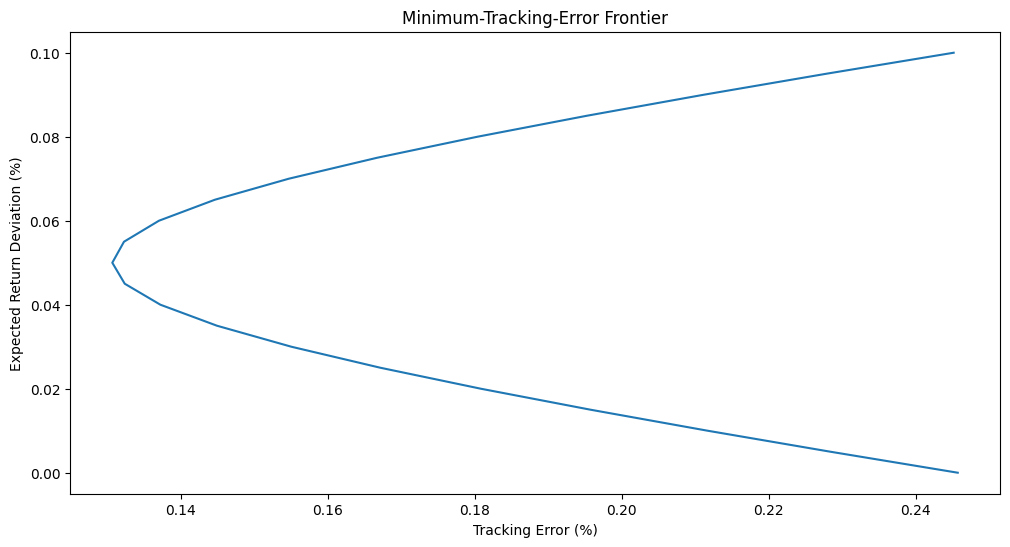

In [33]:
Rmv = alpha / delta

y = np.arange(0,0.1005,0.005)

x = (1/delta + (delta / (zeta * delta - alpha**2)) * ((y - Rmv)**2))**0.5

plt.figure(figsize = (12, 6))
plt.plot(x,y)
plt.ylabel("Expected Return Deviation (%)")
plt.xlabel("Tracking Error (%)")
plt.title("Minimum-Tracking-Error Frontier")

## Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

In [34]:
#tangent 
tangent = 0

xt = np.array([0,0.25])
yt = tangent + (((zeta - (2 * alpha * tangent) + (delta * (tangent**2))))**0.5) * xt

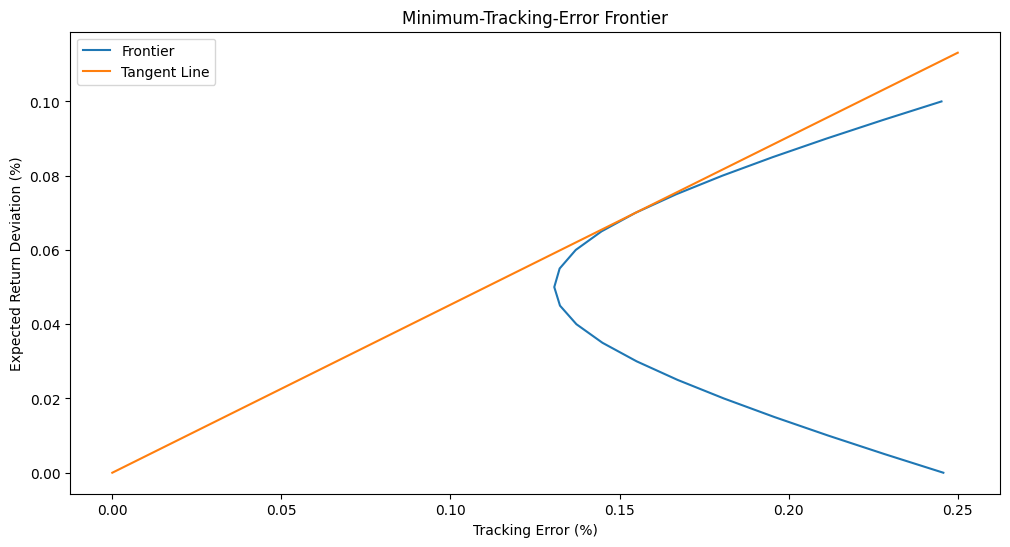

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(x,y,label="Frontier")
plt.plot(xt,yt,label="Tangent Line")
plt.ylabel("Expected Return Deviation (%)")
plt.xlabel("Tracking Error (%)")
plt.title("Minimum-Tracking-Error Frontier")
plt.legend()

## Calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [36]:
# Information Ratio
Information = (zeta - (2 * alpha * tangent) + (delta * (tangent**2)))**0.5

print("The Information ratio for the tangency portfolio is", Information)

The Information ratio for the tangency portfolio is 0.45248753961993327


In [37]:
# Mean Return
Rtg = (alpha * tangent - zeta) / (delta * tangent - alpha)
lamb = (Rtg - tangent)/(zeta - (2 * alpha * tangent) + (delta * tangent * tangent))
wstar = lamb * VI * (R - tangent * e)

table = zip(name, wstar)
col_names = ["Name","Tangency Portfolio Weights"]
print("The tangency portfolio weights for the ten industry portfolios is")
print(tabulate(table, headers = col_names))

The tangency portfolio weights for the ten industry portfolios is
Name      Tangency Portfolio Weights
------  ----------------------------
NoDur                    0.0526342
Durbl                    0.000153428
Manuf                    0.137627
Enrgy                    0.0870322
HiTec                    0.179353
Telcm                    0.071074
Shops                    0.106884
Hlth                     0.102776
Utils                    0.0401622
Other                    0.222304


## Minimum-Variance Frontier w/o Short Sales

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 100000 data points.

Text(0.5, 1.0, 'minimum-variance frontier without short sales - normal')

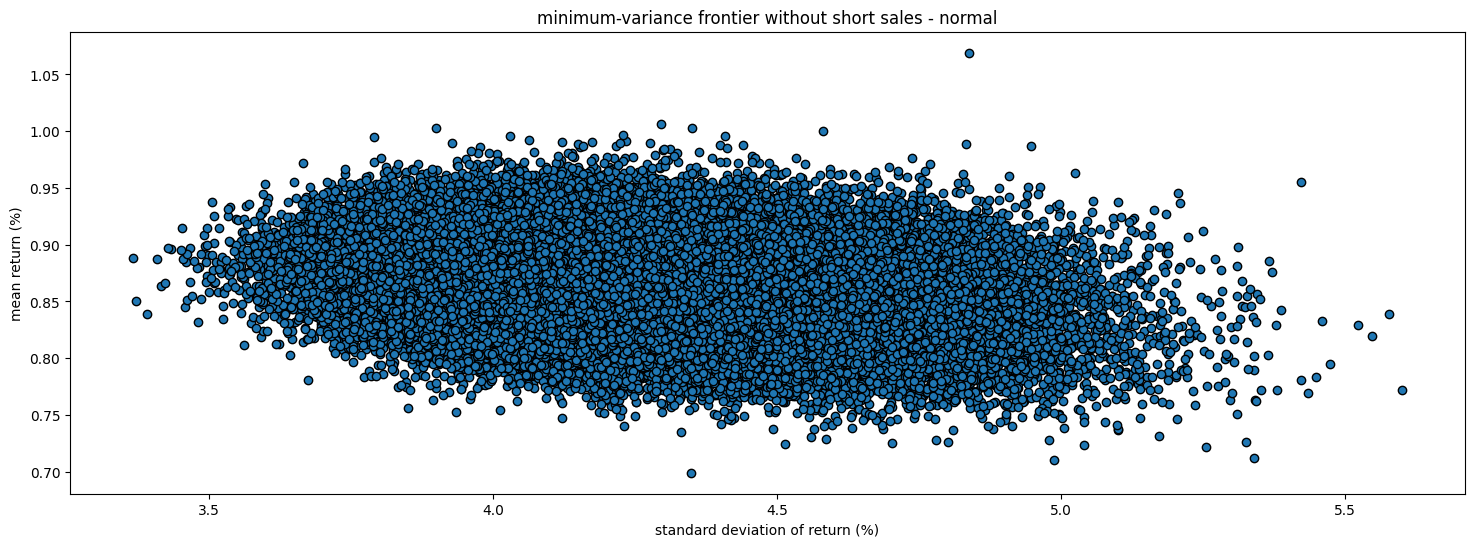

In [38]:
normal_return = []
normal_std = []

cov_matrix = np.cov(industry_df, rowvar=False)

for i in range(100000):
    weight = np.random.uniform(0,1,10)
    weight_normal = weight/sum(weight)
    
    return_normal = np.sum(weight_normal * np.mean(industry_df, axis=0))
    std_normal = np.sqrt(np.dot(weight_normal.T, np.dot(cov_matrix, weight_normal)))
    
    normal_return.append(return_normal)
    normal_std.append(std_normal)
    
plt.figure(figsize = (18, 6))
plt.scatter(normal_std,normal_return,edgecolors = 'black')
plt.xlabel("standard deviation of return (%)")
plt.ylabel("mean return (%)")
plt.title("minimum-variance frontier without short sales - normal")

## Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

Text(0.5, 1.0, 'minimum-variance frontier without short sales - normal')

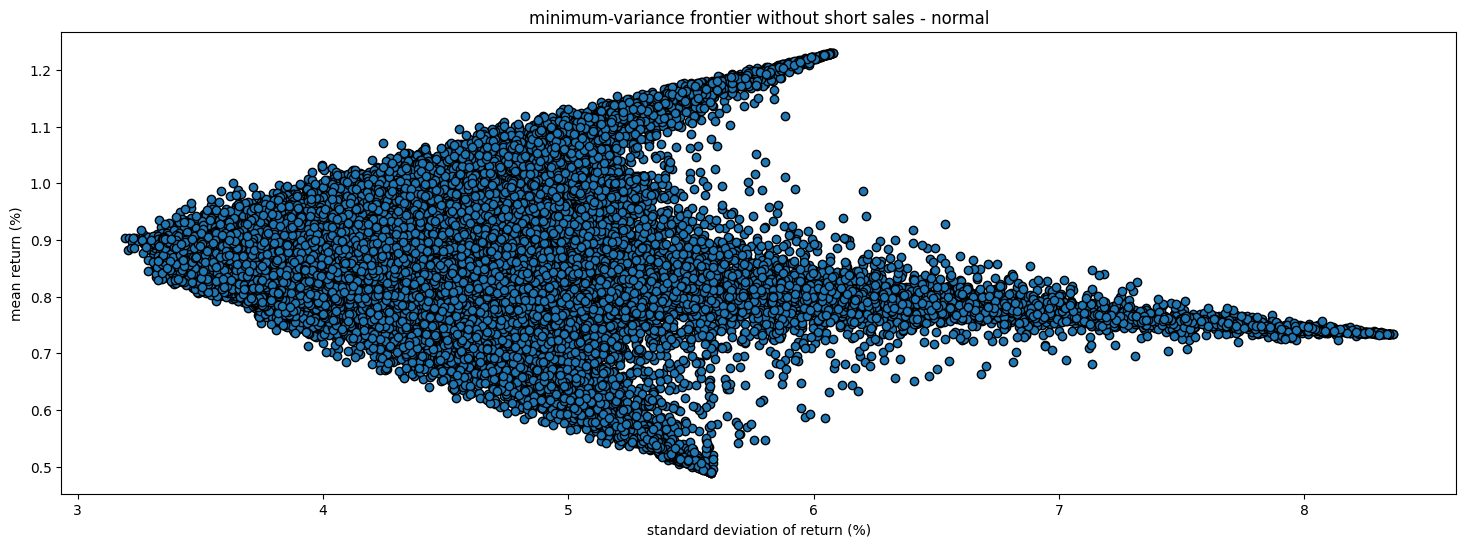

In [39]:
normal_return = []
normal_std = []

cov_matrix = np.cov(industry_df, rowvar=False)

for i in range(100000):
    weight = np.random.uniform(0,1,10)
    weight = 1/weight
    weight_normal = weight/sum(weight)
    
    return_normal = np.sum(weight_normal * np.mean(industry_df, axis=0))
    std_normal = np.sqrt(np.dot(weight_normal.T, np.dot(cov_matrix, weight_normal)))
    
    normal_return.append(return_normal)
    normal_std.append(std_normal)
    
plt.figure(figsize = (18, 6))
plt.scatter(normal_std,normal_return,edgecolors = 'black')
plt.xlabel("standard deviation of return (%)")
plt.ylabel("mean return (%)")
plt.title("minimum-variance frontier without short sales - normal")

# HW 5 / S6

## Stochastic Discount Factor

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:
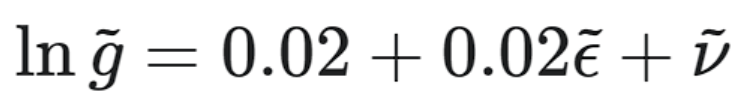
Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate ε with (at least) 10000 random draws from standard normal distribution, and simulate ν with (at least) 10000 random draws from standard uniform distribution.

In [40]:
epsilon_list = []
nu_list = []
consumption_growth_list = []

for i in range(10000):
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu < 0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    
    consumption_growth = np.exp(0.02 + 0.02 * epsilon + nu)
    
    epsilon_list.append(epsilon)
    nu_list.append(nu)
    consumption_growth_list.append(consumption_growth)

Text(0.5, 1.0, 'Epsilon')

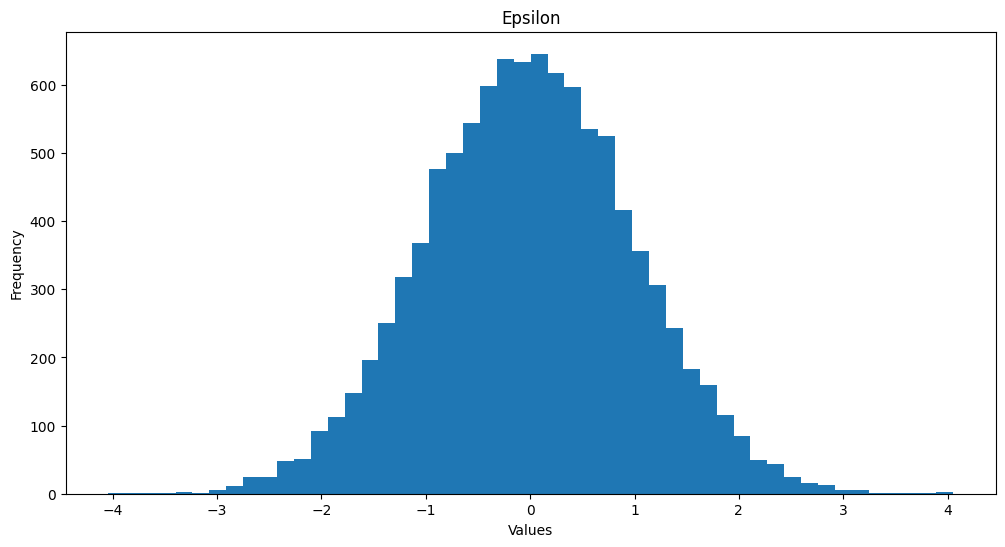

In [41]:
plt.figure(figsize = (12, 6))
plt.hist(epsilon_list,bins = 50)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Epsilon")

In [42]:
unique, frequency = np.unique(nu_list,return_counts = True)
table = zip(unique, frequency)
col_names = ["Value of Nu","Frequency"]
print(tabulate(table, headers = col_names))

  Value of Nu    Frequency
-------------  -----------
    -0.430783          141
     0                9859


Text(0.5, 1.0, 'Consumption Growth')

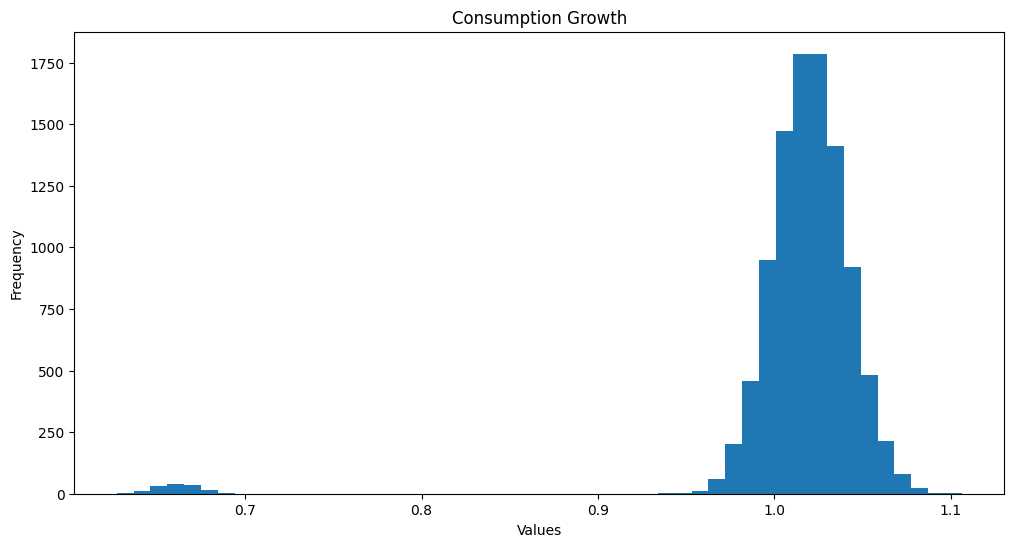

In [43]:
plt.figure(figsize = (12, 6))
plt.hist(consumption_growth_list,bins = 50)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Consumption Growth")

## Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:


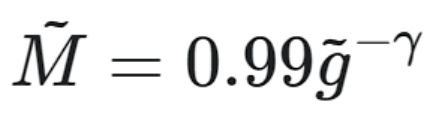


Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal aresult.

In [44]:
gamma = np.arange(0, 4.05, 0.05)

sigma = []
mu = []
gamma_list = []
sigma_over_mu = []

for i in gamma:
    pricing_kernel = 0.99 * (consumption_growth_list ** -i)
    mean = np.mean(pricing_kernel)
    std = np.std(pricing_kernel)
    ratio = std/mean
    
    sigma.append(std)
    mu.append(mean)
    gamma_list.append(i)
    sigma_over_mu.append(ratio)

table = zip(gamma_list, mu, sigma,sigma_over_mu)
col_names = ["Gamma", "Mu of M","Sigma of M", "Sigma/Mu"]
print(tabulate(table, headers = col_names))

  Gamma    Mu of M    Sigma of M    Sigma/Mu
-------  ---------  ------------  ----------
   0      0.99        0           0
   0.05   0.989321    0.00273966  0.00276923
   0.1    0.98865     0.00552632  0.00558976
   0.15   0.987988    0.00836111  0.00846276
   0.2    0.987334    0.0112452   0.0113894
   0.25   0.986688    0.0141796   0.014371
   0.3    0.98605     0.0171658   0.0174086
   0.35   0.985422    0.0202047   0.0205036
   0.4    0.984802    0.0232978   0.0236573
   0.45   0.984191    0.0264462   0.026871
   0.5    0.98359     0.0296512   0.0301459
   0.55   0.982997    0.0329142   0.0334836
   0.6    0.982414    0.0362366   0.0368852
   0.65   0.981841    0.0396196   0.0403524
   0.7    0.981277    0.0430647   0.0438864
   0.75   0.980723    0.0465734   0.0474888
   0.8    0.98018     0.0501471   0.0511611
   0.85   0.979646    0.0537872   0.0549047
   0.9    0.979123    0.0574953   0.0587212
   0.95   0.978611    0.061273    0.0626123
   1      0.978109    0.0651219   0.0

Text(0.5, 1.0, 'Pricing Kernel')

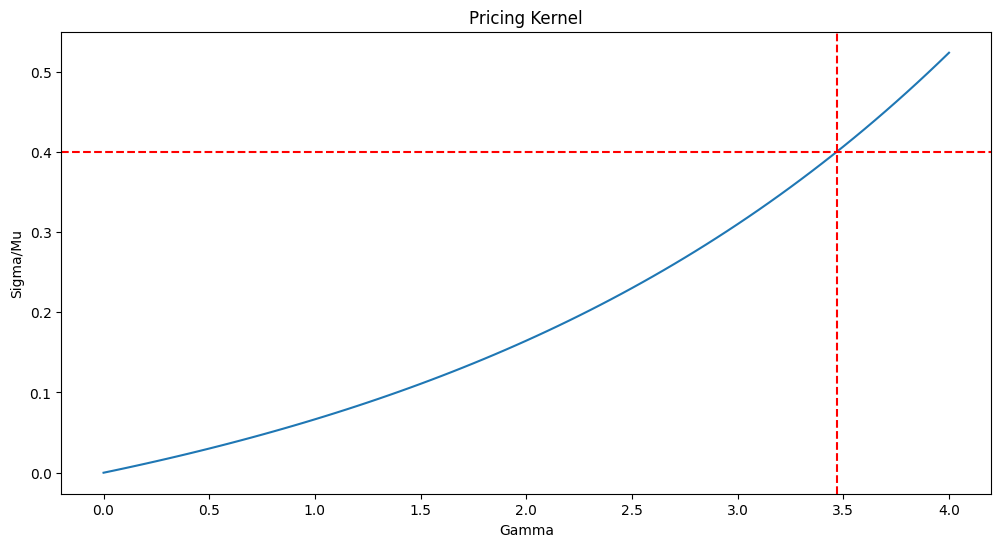

In [45]:
#x value given y is 0.4
xval = np.interp(0.4,sigma_over_mu,gamma_list)

plt.figure(figsize = (12, 6))
plt.plot(gamma_list,sigma_over_mu)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axvline(x = xval, color='r', linestyle='--')
plt.xlabel("Gamma")
plt.ylabel("Sigma/Mu")
plt.title("Hansen-Jagannathan Bound")

In [46]:
# Smallest value of γ (in your data) for which σM/μM > 0.4.
np.interp(0.4,sigma_over_mu,gamma_list)

3.468616616141136

##  Explain (in words, without using any mathematical equations or formulas) the economic significance of this result.

H–J bound: volatility ratio of pricing kernel must exceed Sharpe ratio of 0.4 for US stock market

For investor with power utility of consumption, investor's coefficient of relative risk aversion (γ) affects volatility of pricing kernel ⇒ H–J bound sets lower bound on γ

H–J bound is satisfied for reasonable value of γ when probability distribution of consumption growth includes rare disasters ⇒ no equity premium puzzle

The sharpe ratio for the U.S stock market is 0.4. Gamma represents the coefficient of relative risk aversion.

The pricing kernel plays a crucial role in asset pricing, serving as a stochastic discount factor that links the initial price of an asset to its final value. Two essential conditions for this asset-pricing formula are that the investor's utility function must be strictly increasing and concave, signifying that individuals have a preference for more wealth and are risk-averse. The pricing kernel also reflects the investor's intertemporal marginal rate of substitution (IMRS), indicating the rate at which they are willing to trade present consumption for future consumption. In essence, investors shift between their initial consumption and investment in final consumption to equalize the marginal benefit, optimizing their utility and risk preferences over time.

The Hansen-Jagannathan (H-J) establishes a relationship between the pricing kernel and the risk-return trade-off in financial markets. It states that the volatility ratio of the pricing kernel, which measures the level of risk in the economy, cannot be lower than the highest Sharpe ratio observed across all available portfolios. The Sharpe ratio, a measure of risk-adjusted return, for the U.S. stock market, is typically around 0.4, indicating that investors require a 0.4% excess return for each unit of risk they bear. Therefore, according to the H-J bound, the pricing kernel's volatility ratio must be at least 0.4. This requirement implies that the pricing kernel, must exhibit a certain level of volatility to be consistent with the observed risk-return trade-off in the market, emphasizing the importance of risk assessment and compensation in financial decision-making.

In the power utility of consumption, it assumes a constant coefficient of relative risk aversion (Gamma), it's d optimal consumption growth follows a lognormal distribution, the volatility ratio of the pricing kernel closely approximates the product of Gamma and the volatility of consumption growth. This suggests that Gamma can be viewed as a magnifier of the volatility of consumption growth. It amplifies the impact of changes in the riskiness of consumption on the pricing kernel, highlighting the role of an individual's risk aversion in shaping their investment decisions and risk perceptions in financial markets.

If we consider a Sharpe ratio of 0.4, which represents the risk-adjusted return for the post-war U.S. economy, and a relatively low volatility of consumption growth (2%), the implied level of relative risk aversion (gamma) would need to be unreasonably high, at least 20, to explain the observed equity risk premium. Such a high degree of risk aversion appears unrealistic for typical investors. Ane possible explanation for this puzzle is that the models may not fully account for the true risk in the economy. This is particularly relevant during periods of great economic disruption caused by rare disasters. The volatility and skewness of consumption growth might be understated in these models, especially during times of extreme events .The random variable v, associated with the occurrence of rare disasters, has a significant influence on optimal consumption growth. When a rare disaster happens, with a probability pi, its effect on optimal consumption growth is represented as the natural logarithm of phi, indicating the fraction of optimal consumption that individuals set aside or save to address the consequences of such an event. However, in cases where a rare disaster does not occur, with a probability of 1 - pi, the variable v has no impact on optimal consumption growth. Historical data from major 20th-century disasters suggests that the probability of such rare disasters is relatively low, estimated at 1.7%. When they do occur, the effect on optimal consumption growth is approximated as the natural logarithm of 0.65. This information provides a quantitative basis for modeling and understanding how individuals adapt their consumption behavior and financial decisions in response to the occurrence or non-occurrence of rare, significant events.

The findings from this assignment suggest that the smallest Gamma, or coefficient of relative risk aversion, required to meet the Hansen-Jagannathan (H-J) bound, where the volatility ratio of the Pricing Kernel exceeds the Sharpe Ratio of 0.4, is 3.3. This value represents a reasonable degree of relative risk aversion for investors. One key factor influencing this result is the incorporation of rare disasters into the analysis. These rare disasters significantly enhance the volatility and introduce negative skewness into optimal consumption growth, thereby making the financial landscape more uncertain and riskier. As a consequence, the presence of rare disasters implies that only a relatively small level of risk aversion, represented by Gamma, is needed to align the Pricing Kernel's volatility with the observed Sharpe Ratio, as investors are already contending with increased uncertainty and downside risk due to the rare disaster events. This highlights the role of accounting for extreme events and their impact on financial risk and risk aversion in economic modeling and investment decision-making.

# HW 6 / S8

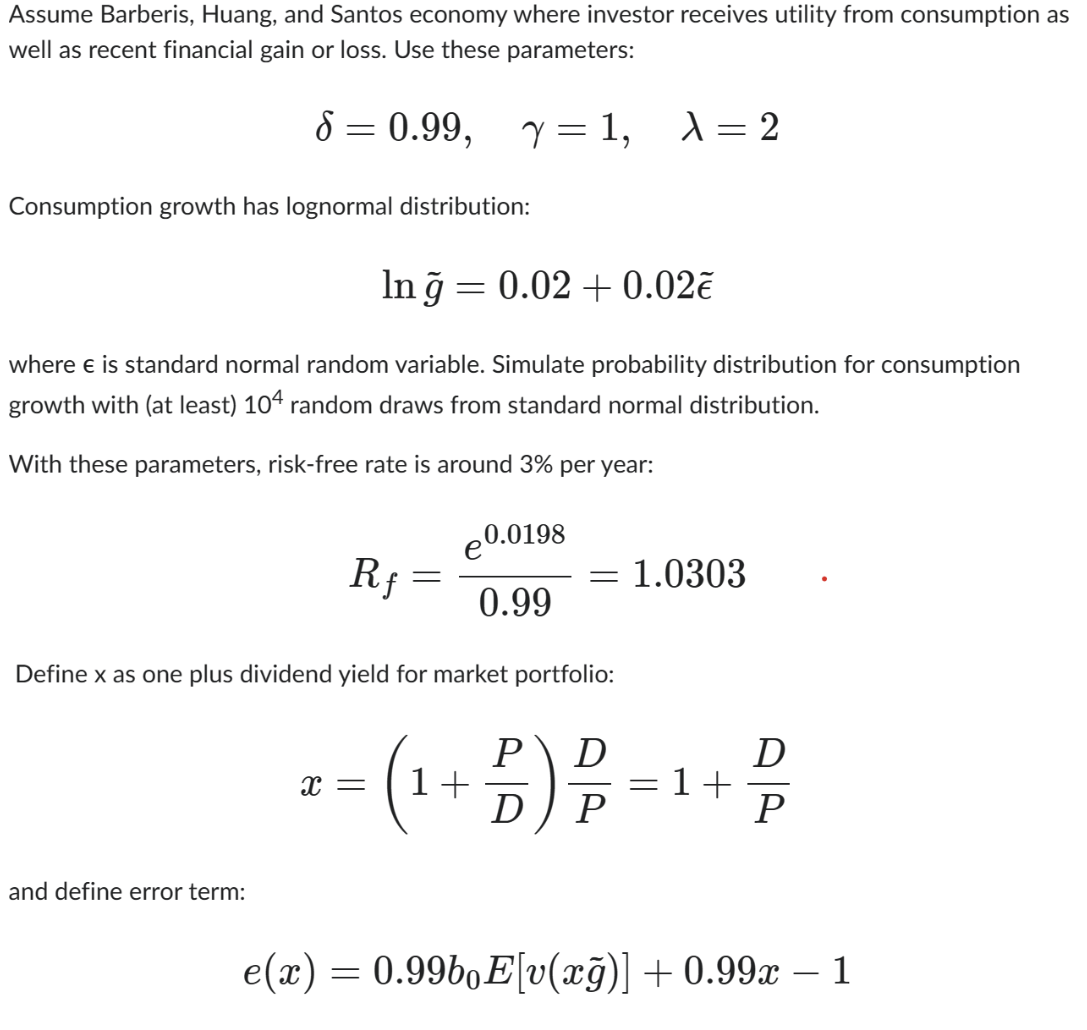

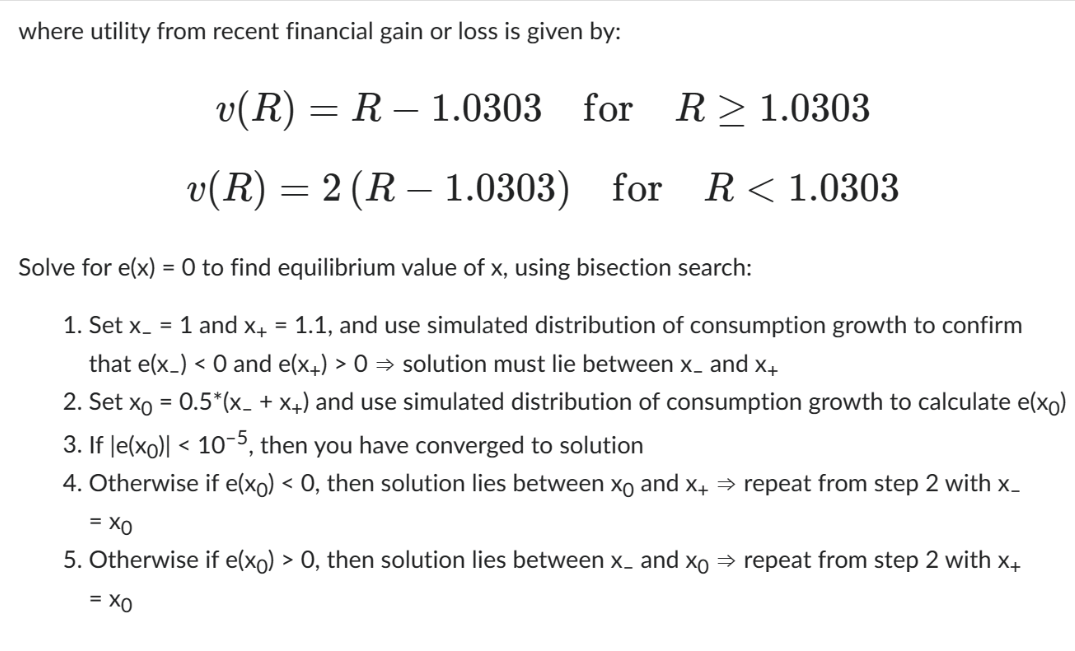

In [47]:
# consumption growth (g = e^(0.02 + 0.02ϵ))
simulation = 100000
consumption_growth_list = []
for i in range(simulation):
    epsilon = np.random.standard_normal()
    consumption_growth = np.exp(0.02 + 0.02*epsilon)

    consumption_growth_list.append(consumption_growth)

In [48]:
# subjective discount factor
delta = 0.99

# risk-free rate
## mean = 0.02 and std = 2%
rf = np.exp(0.02-(0.02/100))/delta

lambd = 2

#b0
b0 = np.arange(0, 10.1, 0.1);

In [49]:
# error term
def e(b0,x):
    vlist=np.mean([utility(x*i) for i in consumption_growth_list])
    return delta*b0*vlist+delta*x-1

In [50]:
# utility from financial gain/loss
def utility(R):
    if R>rf:
        return R-rf
    if R<rf:
        return lambd*(R-rf)

In [51]:
# x = 1 + dividend yield

# bisection search function 
def bisection(x_lower, x_upper, b0):
    x=(x_lower+x_upper)/2
    if (abs(e(b0,x))<10**(-5)):
        return x
    elif e(b0,x)<0:
        x_lower=x
        return bisection(x_lower,x_upper,b0)
    elif e(b0,x)>0:
        x_upper=x
        return bisection(x_lower,x_upper,b0)

# x parameter
x_lower=1
x_upper=1.1

# compute x 
xlist=[bisection(x_lower,x_upper,b0) for b0 in b0]

## Plot price-dividend ratio (on vertical axis) vs b0

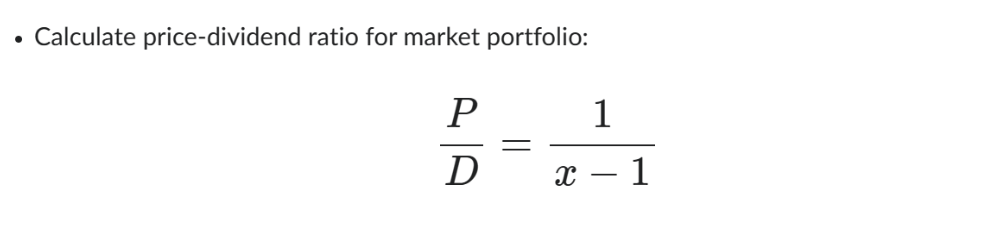

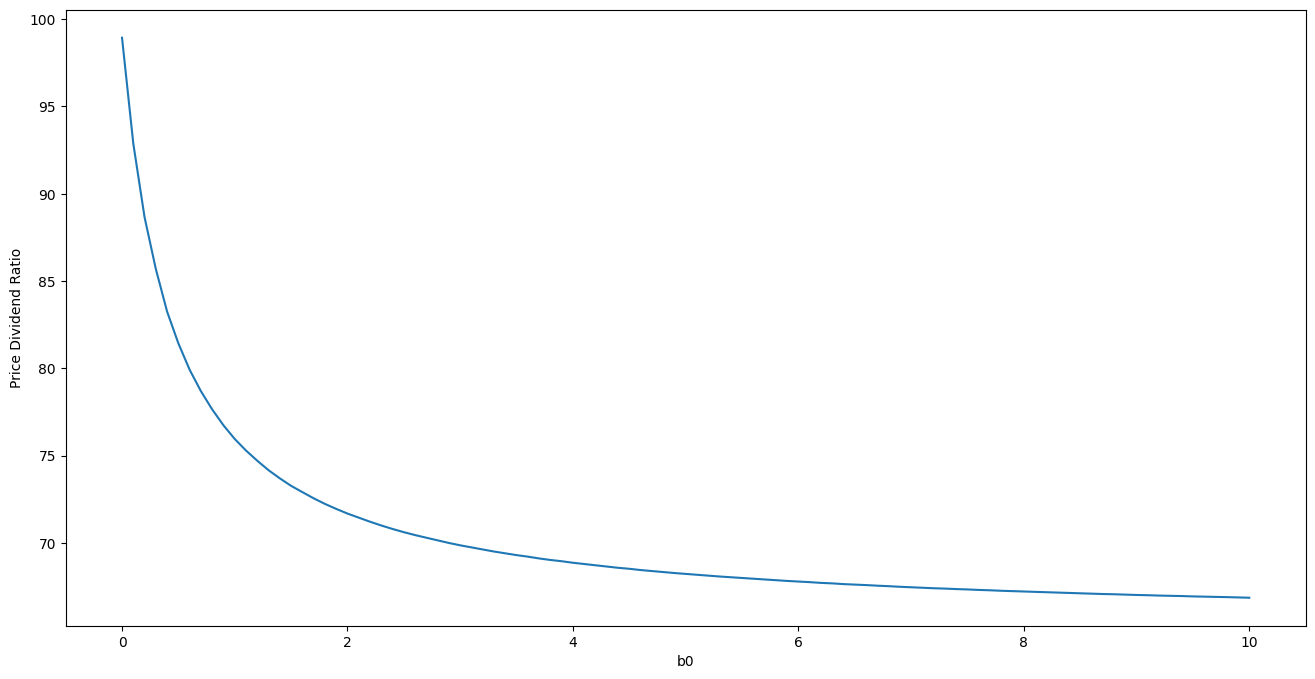

In [52]:
# compute price dividend ratio
price_dividend_ratio = 1/(np.array(xlist)-1)

# plot price-dividend ratio
plt.figure(figsize=(16,8))
plt.plot(b0, price_dividend_ratio)  

plt.xlabel('b0')
plt.ylabel('Price Dividend Ratio')
plt.title('P/D')
plt.show()

## Plot Equity Premium vs b0

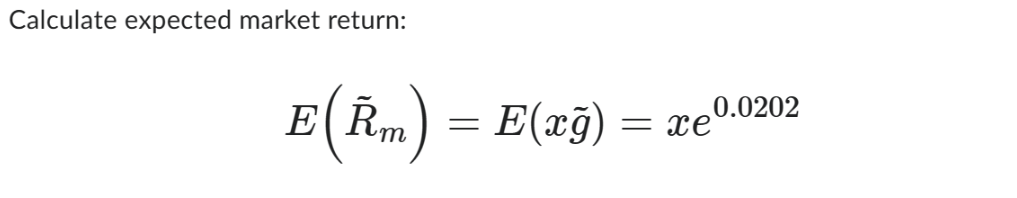

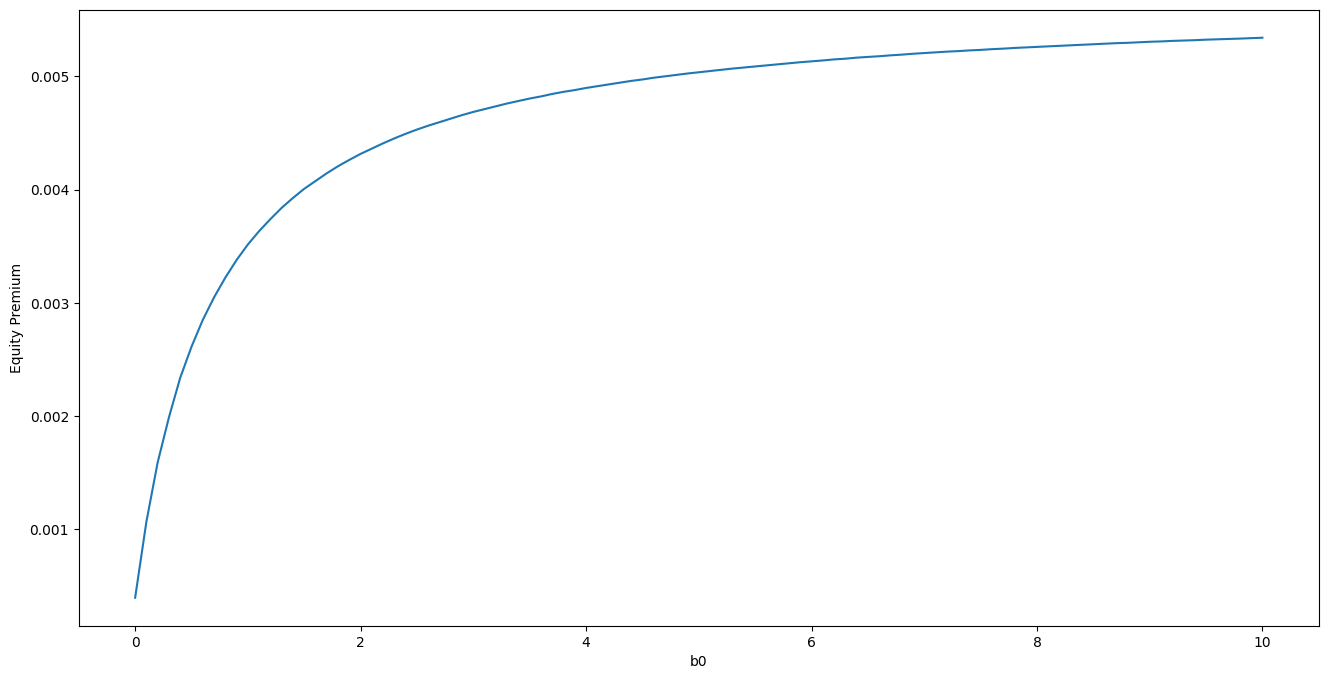

In [53]:
# compute expected market return 
market_return = np.array([np.mean([m*n for n in consumption_growth_list]) for m in xlist])

# compute equity premium
equity_premium = market_return - rf

#plot equity premium
plt.figure(figsize=(16,8))
plt.plot(b0, equity_premium) 

plt.xlabel('b0')
plt.ylabel('%')
plt.title('Market Risk Premium')
plt.show()

## Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.

The utility function v(∙) provides a realistic model of investor behaviour. The gain or loss is measured relative to reference level. The investor is more sensitive to loss than compared to gain, more sensitive to downside risk which is represented by λ.

b0 determines the extent to which utility from recent financial gain or loss contributes to the investor's lifetime utility. if b0 is 0, recent financial gain or loss will not effect the utility and the utility will stay as a power utility. A higher value of b0 means the investors place more weight on recent financial gains and losses when making investment decisions. As b0 increases, the price to dividend ratio decreases and the equity premium increases concavely.

λ is the degree of loss aversion. As λ increases above 1, it indicates a stronger aversion to losses and the downside risk increases.

# State Prices / S9

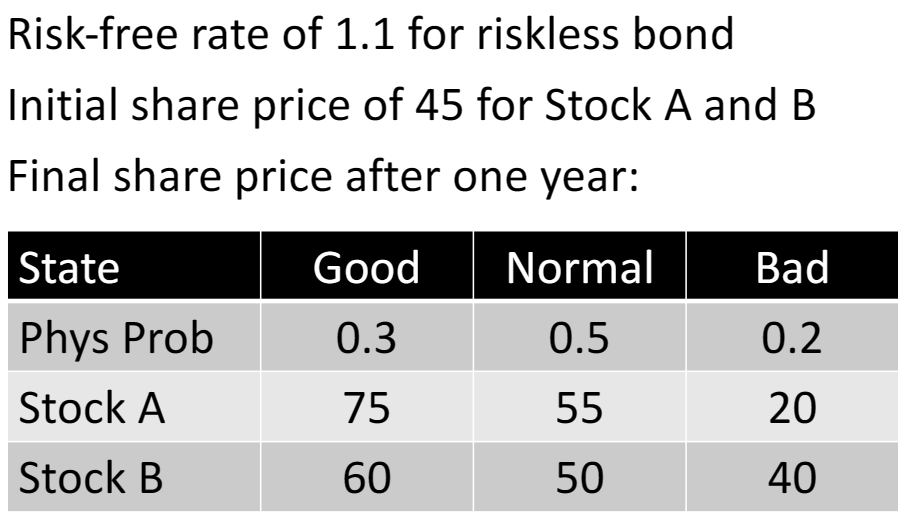

In [21]:
## Vector of state prices
price = np.matrix([1/1.1,45,45])
payoff = np.matrix([[1,75,60],
                    [1,55,50],
                    [1,20,40]])

inv = np.linalg.inv(payoff)

state_price = price*inv
print("The Vector of state prices is:", state_price)

The Vector of state prices is: [[0.22727273 0.40909091 0.27272727]]


In [19]:
## Vector of risk-neutral probabilities
rn = state_price*1.1
print("The Vector of risk-neutral probabilities is:", rn)

The Vector of risk-neutral probabilities is: [[0.25 0.45 0.3 ]]


In [23]:
# Option to buy one share of Stock A and one share of Stock B for 100
option = np.matrix([[75+60-100,0],
                    [55+50-100,0],
                    [20+40-100,0]])

#Vector of final payoffs for option
payoffs = np.max(option, axis=1)
payoffs

matrix([[35],
        [ 5],
        [ 0]])

In [29]:
#initial price for option
option_price = state_price*payoffs
print("The initial price for option is:", option_price)

The initial price for option is: [[10.]]
